# TSM_AppElm Labo02 
## conception d'une antenne

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
class findParam:
    def __init__(self, data,fres):
        self.data = data
        self.fres = fres

    def findMin(self,data):
        val = np.min(data[:,1])
        index = np.where(val == data[:,1])
        return np.squeeze(data[index])

    def findBP(self,data):
        tab = np.where(data[:,1] < -10)
        BPmin = data[tab[0][0]][0]
        BPmax = data[tab[0][len(tab[0])-1]][0]
        return BPmin, BPmax

    def findFreq(self,data,f,offset=0.06):
        tab = np.where((data[:,0] < f+offset) & (data[:,0] > f-offset))
        tab2 = data[tab[0]]
        return np.mean(tab2[:,1])

    def __repr__(self):
        vmin = self.findMin(self.data)
        fmin, fmax = self.findBP(self.data)
        s11F = self.findFreq(self.data,self.fres)
        return "s11 min\t: " + str(vmin) + "\nBP\t: " + str(fmin)+','+str(fmax)+"\n@fr\t: "+str(s11F)

    

In [38]:
dataFR4 = pd.read_csv('result_navigator_fr4_ok.csv',sep=';')
dataFR4


,3D Run ID,L,e,h,i,l1,ls,wl,ws
0,1,39.0,0.035,1.6,0.8,4.0,120.0,1.7,30.0
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


s11 min	: [  2.46399999 -14.23558794]
BP	: 2.3599998950958,2.5759999752045
@fr	: -13.489643818353235

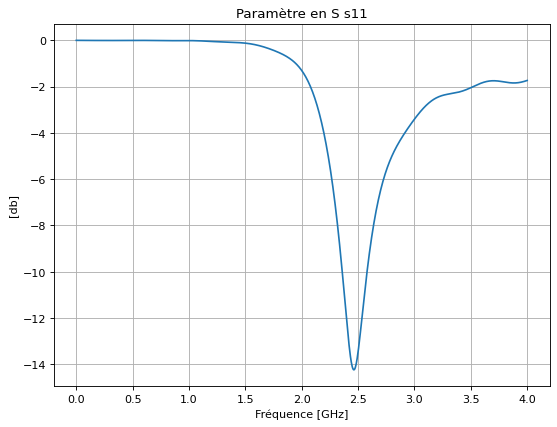

In [41]:
S11_fr4 = np.genfromtxt('antenne_FR4_mode1.txt',delimiter='\t',skip_header=1)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(S11_fr4[:,0], S11_fr4[:,1])
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Paramètre en S s11")

findParam(S11_fr4, 2.45)

## Partie 2 avec de la ceramique

In [5]:
dataCER = pd.read_csv('result_navigator_cer_ok.csv',sep=';')
dataCER
#valeur ok 19

,3D Run ID,L,i,l1,ls,wl,ws
0,1,40.0,0.5,7.65306,100.0,0.2,30.0
1,2,30.0,0.5,7.65306,100.0,0.2,30.0
2,3,27.0,0.5,7.65306,100.0,0.2,30.0
3,4,33.0,0.5,7.65306,100.0,0.2,30.0
4,5,32.0,0.5,7.65306,100.0,0.2,30.0
5,6,32.0,0.5,7.65306,100.0,2.0,30.0
6,7,32.0,1.5,7.65306,100.0,2.0,30.0
7,8,75.0,1.5,7.65306,100.0,2.0,30.0
8,9,75.0,1.5,20.40820,100.0,2.0,50.0
9,10,75.0,0.8,20.40820,100.0,2.0,50.0


s11 min	: [  2.51200008 -12.99334341]
BP	: 2.4000000953674,2.6400001049042
@fr	: -11.715565969702753

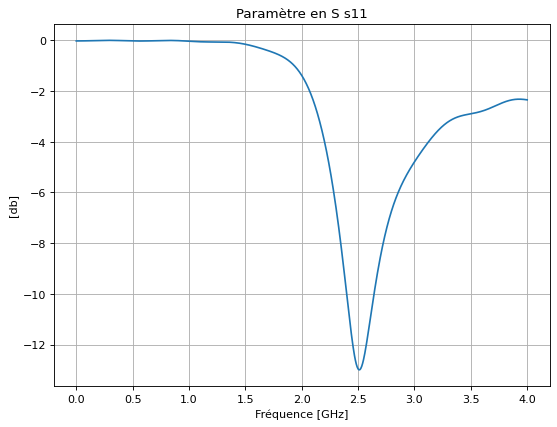

In [46]:
S11_cer = np.genfromtxt('antenne_CER_mode1.txt',delimiter='\t',skip_header=1)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(S11_cer[:,0], S11_cer[:,1])
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Paramètre en S s11")

findParam(S11_cer,2.45)

## Modification de l'antenne FR4 de 10%

In [62]:
legend = ["original","i","ws","ls","l1","l2"]


original
s11 min	: [  2.46399999 -14.23558794]
BP	: 2.3599998950958,2.5759999752045
@fr	: -13.489643818353235

i
s11 min	: [  2.46799994 -14.45157431]
BP	: 2.364000082016,2.5880000591278
@fr	: -13.628570346699199

ws
s11 min	: [  2.46399999 -14.17606917]
BP	: 2.3599998950958,2.5759999752045
@fr	: -13.440081771748368

ls
s11 min	: [  2.46399999 -14.22570741]
BP	: 2.3599998950958,2.5759999752045
@fr	: -13.477996808736332

l1
s11 min	: [  2.44000006 -13.30825637]
BP	: 2.3440001010895,2.5439999103546
@fr	: -12.727463830712265

l2
s11 min	: [  2.27600002 -15.2657695 ]
BP	: 2.1800000667572,2.3880000114441
@fr	: -7.7672328611058665


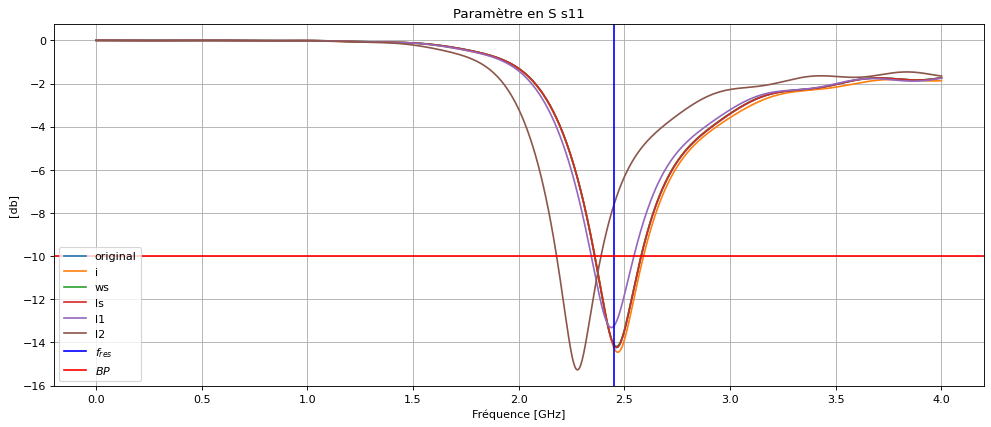

In [69]:
S11_m_fr4 = np.zeros((1001,2,6))

plt.figure(figsize=(15, 6), dpi=80)
for k in range(0,6):
    filename = 'variationsFR4/modificationsFR4_'+ str(k) +'.txt'
    S11_m_fr4[:,:,k] = np.genfromtxt(filename,delimiter='\t',skip_header=1)
    plt.plot(S11_m_fr4[:,0,k], S11_m_fr4[:,1,k],label=legend[k])
    print('\n'+legend[k])
    print(findParam(S11_m_fr4[:,:,k],2.45))
plt.axvline(x = 2.45, color = 'b', label = '$f_{res}$') 
plt.axhline(y = -10, color = 'r', label = '$BP$') 
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Paramètre en S s11")
plt.legend()
plt.show()


In [ ]:
S11_m_cer = np.zeros((1001,2,6))

plt.figure(figsize=(15, 6), dpi=80)
for k in range(0,6):
    filename = 'variationsCER/modificationsCER_'+ str(k) +'.txt'
    S11_m_cer[:,:,k] = np.genfromtxt(filename,delimiter='\t',skip_header=1)
    plt.plot(S11_m_cer[:,0,k], S11_m_cer[:,1,k],label=legend[k])
    print('\n'+legend[k])
    print(findParam(S11_m_cer[:,:,k],2.45))
plt.axvline(x = 2.45, color = 'b', label = '$f_{res}$') 
plt.axhline(y = -10, color = 'r', label = '$BP$') 
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Paramètre en S s11")
plt.legend()
plt.show()